<a href="https://colab.research.google.com/github/SeoMinJong/1day-1study/blob/master/credit_my_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터를 가져와서 기본적인 설정과 결측치 제거 및 column들 데이터 파악

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option("precision",2) # precision 소숫점 자리수를 두 자리까지만 출력하는 pandas option

In [4]:
df = pd.read_csv('C:/Users/SeoMinJong/github/1day1study/data_credit.csv')

In [5]:
df.head(3)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [7]:
# 결측치가 있다. 결측치가 얼마나 있는지 파악해봐야 한다.
null_df = df.isnull()
null_df.sum()
# 결측치 확인 결과 installments만 결측치가 있는 것으로 판별

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [8]:
# null값을 제외한 다른 값들은 어떤 것이 있고 얼마나 있는지 확인할 수 있다.
df.installments.value_counts()

3.0     10686
2.0      3431
5.0      1220
6.0       647
10.0      252
4.0       209
12.0      206
24.0       96
8.0        32
7.0        28
9.0        25
18.0       11
20.0        6
36.0        5
22.0        4
15.0        2
Name: installments, dtype: int64

In [9]:
# df에서 null값을 fillna를 사용해서 결측치를 1로 대체해준다.
# df에서 null값이 있는 colunm은 installments를 가져와서 그대로 installments에 넣어줘서 결측치를 제거해 줬다.
# 그 후 installments의 개수를 알기 위해 value_counts를 사용해서 총 개수들을 알수있다.
df.installments = df.installments.fillna(value=1)
df.installments.value_counts()

1.0     3345936
3.0       10686
2.0        3431
5.0        1220
6.0         647
10.0        252
4.0         209
12.0        206
24.0         96
8.0          32
7.0          28
9.0          25
18.0         11
20.0          6
36.0          5
22.0          4
15.0          2
Name: installments, dtype: int64

In [10]:
# data와 time을 그대로 추출해서 쓰기 어렵기 때문에 data에서 month와 time에서 hour을 뽑아서 새로운 column을 만들어준다.
df['month'] = df.date.apply( lambda x : x[5:7] ) # month에 대한 column을 만든다.
df['hour'] = df.time.apply( lambda x : x[:2]) # hour에 대한 columns을 만든다.

In [11]:
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,12,18
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,12,18
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,12,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,12,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,12,13


In [12]:
# 필요한 month와 hour를 빼냈으니 필요없는 date와 time을 삭제해준다.
df = df.drop(columns=['date','time'])

In [13]:
# 필요없는 데이터들을 삭제하고 나서 df를 확인해준다.
df.head(3)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,1.0,2,0,12,18
1,0,d297bba73f,-5,1.0,2,0,12,18
2,0,0880849c05,144,1.0,0,0,12,12


# 완성된 df를 분석 시작

In [14]:
df.head(3)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,1.0,2,0,12,18
1,0,d297bba73f,-5,1.0,2,0,12,18
2,0,0880849c05,144,1.0,0,0,12,12


In [15]:
fred1 = df['store_id'].value_counts() # 가장 거래 내역이 많은 store
fred1

0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
1605        1
991         1
1263        1
1530        1
632         1
Name: store_id, Length: 1775, dtype: int64

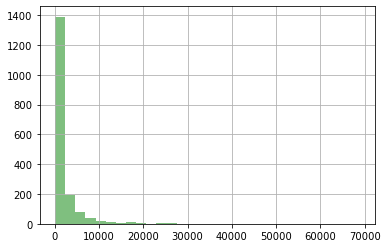

In [16]:
# store의 이용빈도를 hist그래프로 빈도수를 파악한다. 

fred1.hist(bins=30, color='green', alpha=0.5)
plt.show()

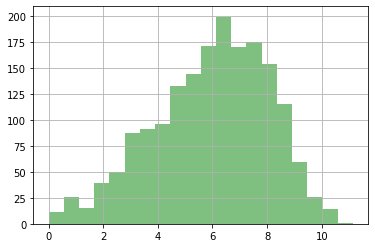

In [17]:
# 값이 너무 치우쳐져 있기때문에 log를 사용해서 값들을 비율적으로 낮춰줬다.

fred1_log = np.log(fred1)
fred1_log.hist(bins = 20, color='green', alpha=0.5)
plt.show()

In [18]:
# 값들의 대략적인 수치 정보 파악
# 가게의 평균 판매 개수는 1894개이다.
fred1.describe()

count     1775.00
mean      1894.53
std       4056.02
min          1.00
25%        102.50
50%        492.00
75%       1940.00
max      68773.00
Name: store_id, dtype: float64

In [19]:
# 가장 손님이 많았던 가게 10군데의 id

fred1.sort_values(ascending=False)

0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
608         1
201         1
951         1
727         1
632         1
Name: store_id, Length: 1775, dtype: int64

In [20]:
df.head(4)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,1.0,2,0,12,18
1,0,d297bba73f,-5,1.0,2,0,12,18
2,0,0880849c05,144,1.0,0,0,12,12
3,0,8b4f9e0e95,66,1.0,0,0,12,12


In [21]:
# 총 922522 명의 카드가 인식되었다.
df['card_id'].nunique()

922522

In [22]:
# df에 card_id의 빈도수를 파악하는데 top10을 매겨본다

fred2 = df['card_id'].value_counts()
fred2[:10]

53817035d4    835
93bba5079c    512
994b71a98a    458
18549044f3    453
6b2d18c5c5    433
10a5c30cda    425
06e61d93b8    423
5cf0b23473    413
0177959e09    409
a9a1e3d97d    405
Name: card_id, dtype: int64

In [23]:
# card_id의 count로 describe를 사용해 대략적인 계산 값을 얻었다.
fred2.describe()

count    922522.00
mean          3.65
std           6.93
min           1.00
25%           1.00
50%           2.00
75%           4.00
max         835.00
Name: card_id, dtype: float64

In [24]:
# card_id의 빈도수중에 max값이 특출나기 때문에 확인
# card_id의 빈도수중 가장 많은 빈도로 사용한 이용자는 소량구매를 많이 하고 있다.

card_bin_max = df['card_id'] == '53817035d4'
card_bin_max = df[card_bin_max]
card_bin_max.sort_values('amount', ascending=False)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
2941611,1551,53817035d4,58,1.0,3,0,09,20
2941796,1551,53817035d4,55,1.0,2,0,09,20
2941593,1551,53817035d4,55,1.0,2,0,09,19
2941012,1551,53817035d4,52,1.0,3,0,08,20
2942301,1551,53817035d4,42,1.0,1,0,10,19
...,...,...,...,...,...,...,...,...
2946693,1551,53817035d4,4,1.0,2,0,05,08
2946742,1551,53817035d4,4,1.0,3,0,05,12
2946957,1551,53817035d4,3,1.0,6,0,05,13
2947305,1551,53817035d4,-7,1.0,6,0,06,18


<AxesSubplot:>

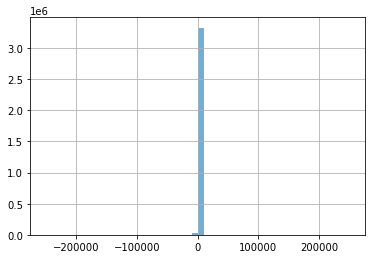

In [25]:
# 폭이 매우 커서 이 상태로는 볼 수 있는 것이 없다.
df.amount.hist(bins=50, alpha = 0.6)

In [26]:
# df.amount > 0로 식을 주면 0과 1의 값으로 반환해서 값을 넣어주기 때문에 이를 활용하여 실제로 구매를 한 비율이 얼마인지 찾을 수 있다.

ser = df.amount > 0
np.round(ser.mean(),4)

0.9896

In [124]:
df.loc[df.amount.argmax()]['amount']

a = pd.qcut(df['amount'], 4).cat.categories.right
df1 = pd.DataFrame([a], columns=['25%','50%','75%','100%'])
# qcut을 활용한 amount의 값을 나눠주었다.
# 0<= 32>=, 32< 75>=, 75< 150>=, 150< 250000>=으로 나눠서 표로 만들어 줘서 사용자가 어느 위치에 많이 분포하고 있는지를 확인할 수 있을 것 같다.

def amount_count(df,last_num,**kwargs):
    if 'start_num' in kwargs:
        amount_0_0= df['amount'] > kwargs.get('start_num')
        amount_0_1 = df['amount'] <= last_num
        amount_0 = df[amount_0_0 & amount_0_1]
        amount_0_count = (amount_0.count())
        amount_0_count = amount_0_count['amount']
    else:
        amount_0_0= df['amount'] > df['amount'].min()
        amount_0_1 = df['amount'] <= last_num
        amount_0 = df[amount_0_0 & amount_0_1]
        amount_0_count = (amount_0.count())
        amount_0_count = amount_0_count['amount']
    return amount_0_count

amount_0_count = amount_count(df,0)
amount_1_count = amount_count(df,32,start_num=0)
amount_2_count = amount_count(df,75,start_num=32)
amount_3_count = amount_count(df,150,start_num=75)
amount_4_count = amount_count(df,df['amount'].max(),start_num=150)

print(amount_0_count)
print(amount_1_count)
print(amount_2_count)
print(amount_3_count)
print(amount_4_count)
# amount_0~4_count : 4분위로 나누고 그 안에 있는 개수와 -의 값 즉, 환불의 개수를 파악한다.

34855
823535
858418
813258
832729


In [118]:
df['amount'].min()

-250000

In [99]:
df.loc[df.amount.argmax()]

store_id               370
card_id         1c492f54f0
amount              250000
installments           3.0
days_of_week             0
holyday                  0
month                   01
hour                    12
Name: 929470, dtype: object

In [28]:
max_amount_stroe_id = df['store_id'] == 370
max_amount_stroe_id = df.loc[max_amount_stroe_id]

In [29]:
# 가장 비싼 매출을 낸 가게의 매출개수는 196건이다.
max_amount_stroe_id.value_counts('store_id')

store_id
370    196
dtype: int64

In [30]:
# 환불의 비율이 몇개인지 알아보자
max_store_return = max_amount_stroe_id['amount'] < 0
round(max_store_return.mean(),4)

# 환불의 비율이 35%나 되기 때문에 이 가게에 주시해야할 필요가 있다.

0.352

In [31]:
# 가장 높은 금액을 한번에 지불한 카드id를 집중 탐색
amount_max_card_id = (df.iloc[df.amount.argmax()])['card_id']

In [32]:
# 가장 높은 금액을 지불한 사람의 거래 내역
# 거래 내역을 보니 한번에 많은 금액을 지불하고 환불 받은 것 외에는 거래 내역이 없다.
# 이상치

amount_max_custmor = df.card_id == amount_max_card_id
amount_max_custmor = df[amount_max_custmor]
amount_max_custmor

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
929470,370,1c492f54f0,250000,3.0,0,0,01,12
929473,370,1c492f54f0,-250000,3.0,0,0,03,19


In [33]:
# installments(할부개월)을 개월수별로 몇건이나 있는지 파악
fred3 = df['installments'].value_counts()
fred3

1.0     3345936
3.0       10686
2.0        3431
5.0        1220
6.0         647
10.0        252
4.0         209
12.0        206
24.0         96
8.0          32
7.0          28
9.0          25
18.0         11
20.0          6
36.0          5
22.0          4
15.0          2
Name: installments, dtype: int64

In [34]:
    # 다시 sort_values를 써서 fred3를 재배열해준다.
    fred3.sort_values(ascending=False)

1.0     3345936
3.0       10686
2.0        3431
5.0        1220
6.0         647
10.0        252
4.0         209
12.0        206
24.0         96
8.0          32
7.0          28
9.0          25
18.0         11
20.0          6
36.0          5
22.0          4
15.0          2
Name: installments, dtype: int64

<AxesSubplot:>

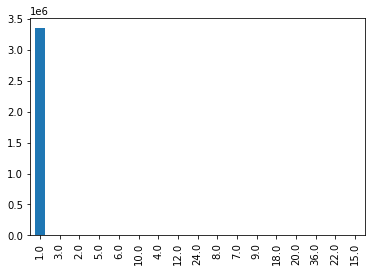

In [35]:
# 해당 그래프에는 1밖에 보이지 않기 때문에 1을 제외하고 구해준다.
fred3.plot(kind='bar')

3.0     10686
2.0      3431
5.0      1220
6.0       647
10.0      252
4.0       209
12.0      206
24.0       96
8.0        32
7.0        28
9.0        25
18.0       11
20.0        6
36.0        5
22.0        4
15.0        2
Name: installments, dtype: int64


<AxesSubplot:>

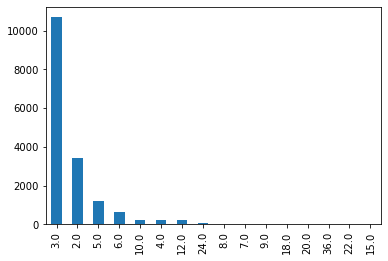

In [36]:
# 1개월을 제외하면 3개월이 가장 많은 빈도수를 차지한다.

fred3_1 = fred3.iloc[1:]
print(fred3_1)
fred3_1.plot.bar()


나중에 두 개의 변수를 사용할 때 installments과 amount로 해봐야겠다.

days_of_week 변수를 파악

In [37]:
df.head(3)
df_10 = df.iloc[:10]

In [38]:
# df의 days_of_week만 가져와서 value_counts()를 사용해서 요일별 결제 건수를 파악
fred4 = df['days_of_week'].value_counts()
fred4

5    533093
4    511031
3    472820
2    471573
1    467276
6    462156
0    444847
Name: days_of_week, dtype: int64

In [39]:
# fred4를 sort_index()를 사용해서 요일별로 정렬해준다.
fred4 = fred4.sort_index()
fred4

0    444847
1    467276
2    471573
3    472820
4    511031
5    533093
6    462156
Name: days_of_week, dtype: int64

<AxesSubplot:>

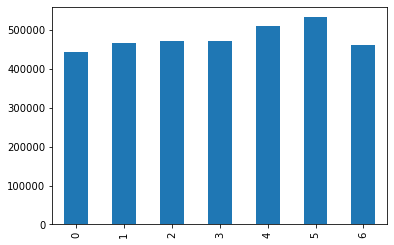

In [40]:
fred4.plot.bar()

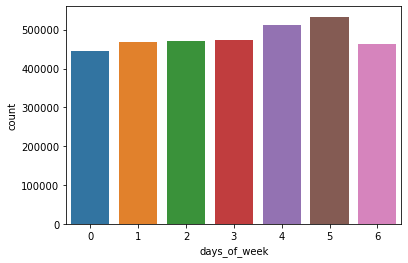

In [41]:
# seaborn에 있는 countplot을 사용하면 x값을 넣어줘서 count의 개수를 구한다.
sns.countplot(data=df, x='days_of_week')
plt.show()

holyday 변수에 관한 분석

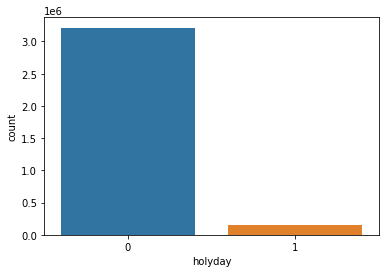

In [42]:
sns.countplot(data=df, x='holyday')
plt.show()

In [44]:
df_holyday_0 = df['holyday'] == 0
df_holyday_1 = df['holyday'] == 1

print(df_holyday_0.sum(), df_holyday_1.sum())

3213781 149015


In [46]:
df.head(3)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,1.0,2,0,12,18
1,0,d297bba73f,-5,1.0,2,0,12,18
2,0,0880849c05,144,1.0,0,0,12,12


month에 대한 분석

In [56]:
df['month'].unique()
fred5 = df['month'].value_counts()
fred5 = fred5.sort_index()
fred5 # month별 count개수

01    258378
02    250079
03    310753
04    318366
05    331971
06    332230
07    334019
08    237922
09    240458
10    244391
11    239853
12    264376
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

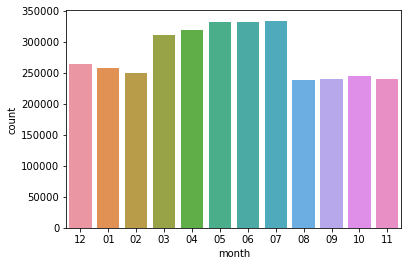

In [50]:
sns.countplot(data=df, x='month')

hour에 대한 분석

In [63]:
df['hour']
temp = df['hour'].unique()
temp.sort()
temp # 00~23으로 시간을 표시함

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [ ]:
fred6 = df['hour'].value_counts()
fred6 = fred6.sort_index()
fred6 # 시간대 별로 결제 횟수가 얼마인지 & 정렬까지

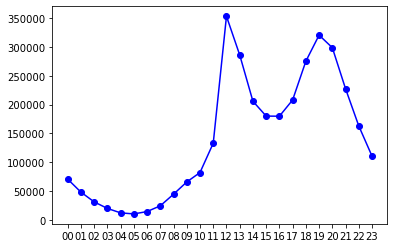

In [92]:
plt.plot(temp,fred6,'b-o')
plt.show()
# 시간대 별 결제 횟수 시각화

두개의 column을 묶어서 분석

한개의 cloumn 추출 데이터들 정리  
fred1 : stroe_id의 판매 회수를 정렬  
fred2 : card_id의 구입,환불 정렬  
fred3 : installments의 분포 (1개월(일시불)~)  
fred4 : days_of_week의 분포 (요일별 건수)  
fred5 : month의 분포 (월 별 건수)  
fred6 : hour의 분포 (시간대별 )

In [95]:
df.head(3)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,1.0,2,0,12,18
1,0,d297bba73f,-5,1.0,2,0,12,18
2,0,0880849c05,144,1.0,0,0,12,12


In [150]:
fred1_1 = df[['store_id','amount']]

In [217]:
grouped = fred1_1['amount'].groupby(fred1_1['store_id'])
grouped_sum = grouped.sum().sort_values(ascending=False)
amount_max_store = grouped_sum[:5]
grouped_sum = grouped_sum.sort_values()
amount_min_store = grouped_sum[:5]
display(amount_max_store)
display(amount_min_store)
# 최대 매출 store와 최소 매출 store를 알아봄

store_id
753     9474601
1342    7301327
161     5236075
0       5234611
958     4965728
Name: amount, dtype: int64

store_id
988    0
866    0
350    0
703    5
608    5
Name: amount, dtype: int64

In [219]:
amount_min_store_index = amount_min_store.index
amount_min_store_index

amount_min_store_idx = []
for index in amount_min_store_index:
    amount_min_store_idx.append(index)

amount_min_store_idx

[988, 866, 350, 703, 608]

In [252]:
# 최소 매출의 store들의 매출 내역은 어떻게 되는지 확인해 봐야겠다.
worst_all_store = pd.DataFrame(columns=df.columns)

worst_1_store = df['store_id'] == amount_min_store_idx[0]
worst_1_store = df[worst_1_store]

worst_2_store = df['store_id'] == amount_min_store_idx[1]
worst_2_store = df[worst_2_store]

worst_3_store = df['store_id'] == amount_min_store_idx[2]
worst_3_store = df[worst_3_store]

worst_4_store = df['store_id'] == amount_min_store_idx[3]
worst_4_store = df[worst_4_store]

worst_5_store = df['store_id'] == amount_min_store_idx[4]
worst_5_store = df[worst_5_store]

for idx in amount_min_store_idx:
    worst_store = df['store_id'] == idx
    worst_store_df = df[worst_store]
    worst_all_store = worst_all_store.append(worst_store_df)

In [255]:
amount_max_store_index = amount_max_store.index
amount_max_store_index

amount_max_store_idx = []
for index in amount_max_store_index:
    amount_max_store_idx.append(index)

amount_max_store_idx

[753, 1342, 161, 0, 958]

In [259]:
amount_max_store_idx = []
for index in amount_max_store_index:
    amount_max_store_idx.append(index)

print(amount_max_store_idx)

# 최고 매출의 store들의 매출 내역은 어떻게 되는지 확인해 봐야겠다.
best_all_store = pd.DataFrame(columns=df.columns)

best_1_store = df['store_id'] == amount_max_store_idx[0]
best_1_store = df[best_1_store]

best_2_store = df['store_id'] == amount_max_store_idx[1]
best_2_store = df[best_2_store]

best_3_store = df['store_id'] == amount_max_store_idx[2]
best_3_store = df[best_3_store]

best_4_store = df['store_id'] == amount_max_store_idx[3]
best_4_store = df[best_4_store]

best_5_store = df['store_id'] == amount_max_store_idx[4]
best_5_store = df[best_5_store]

for idx in amount_max_store_idx:
    best_store = df['store_id'] == idx
    best_store_df = df[best_store]
    best_all_store = best_all_store.append(best_store_df)

display(best_all_store)
best_all_store.info()

[753, 1342, 161, 0, 958]


,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
1574989,753,43b3c0320a,5,1.0,3,0,12,11
1574990,753,43b3c0320a,-5,1.0,3,0,12,11
1574991,753,1c1bd863ca,150,1.0,3,0,12,12
1574992,753,41cbf3da72,300,1.0,3,0,12,12
1574993,753,36d67e084f,150,1.0,3,0,12,12
...,...,...,...,...,...,...,...,...
1894044,958,96a796f304,8981,3.0,1,0,07,10
1894045,958,df52b95b22,1500,1.0,1,0,07,14
1894046,958,e65424a0c6,1751,1.0,1,0,07,15
1894047,958,e65424a0c6,55,1.0,1,0,07,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 176406 entries, 1574989 to 1894048
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store_id      176406 non-null  object 
 1   card_id       176406 non-null  object 
 2   amount        176406 non-null  object 
 3   installments  176406 non-null  float64
 4   days_of_week  176406 non-null  object 
 5   holyday       176406 non-null  object 
 6   month         176406 non-null  object 
 7   hour          176406 non-null  object 
dtypes: float64(1), object(7)
memory usage: 12.1+ MB


최소 최대 매출 상점의 매출 표

## installments와 amount의 상관관계
큰 의미를 파악하기 어려웠다.

In [268]:
fred2_1 = df[['installments','amount']]
grouped = fred2_1['amount'].groupby(df['installments'])
fred2_1_count = grouped.count()
fred2_1_mean = grouped.mean()
display(fred2_1_count)
display(fred2_1_mean)

installments
1.0     3345936
2.0        3431
3.0       10686
4.0         209
5.0        1220
6.0         647
7.0          28
8.0          32
9.0          25
10.0        252
12.0        206
15.0          2
18.0         11
20.0          6
22.0          4
24.0         96
36.0          5
Name: amount, dtype: int64

installments
1.0      138.33
2.0      774.33
3.0     1555.70
4.0     2052.77
5.0     2415.32
6.0     3825.23
7.0     3040.04
8.0     2772.47
9.0     2556.76
10.0    5048.83
12.0    4470.67
15.0    5290.00
18.0    2655.82
20.0    4983.33
22.0       0.00
24.0    3866.39
36.0     860.40
Name: amount, dtype: float64

할부 개월 수와 금액의 상관관계를 파악

In [ ]:
plt.plot(fred2_1_mean)

## days_of_week과 amount의 상관관계

요일별 매출액을 보자

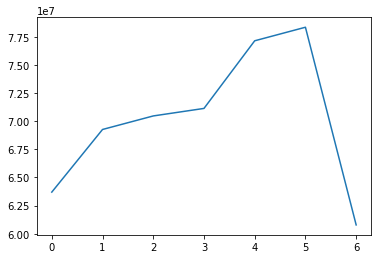

In [281]:
fred2_2 = df[['days_of_week','amount']]

grouped = fred2_2['amount'].groupby(df['days_of_week'])

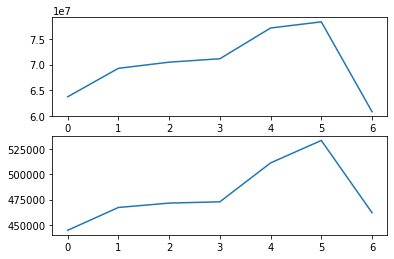

In [292]:
# 요일당 판매,환불 건수
plt.subplot(211)
plt.plot(grouped.sum())
plt.subplot(212)
plt.plot(fred4)

## month와 amount를 그래프 확인

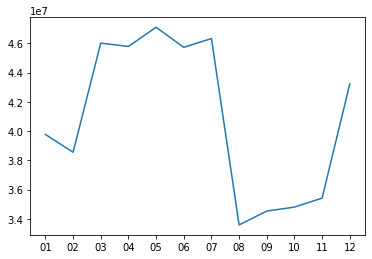

In [297]:
fred2_3 = df[['month','amount']]
fred2_3_1 = fred2_3['amount'].groupby(fred2_3['month'])
fred2_3_sum = fred2_3_1.sum()
plt.plot(fred2_3_sum)

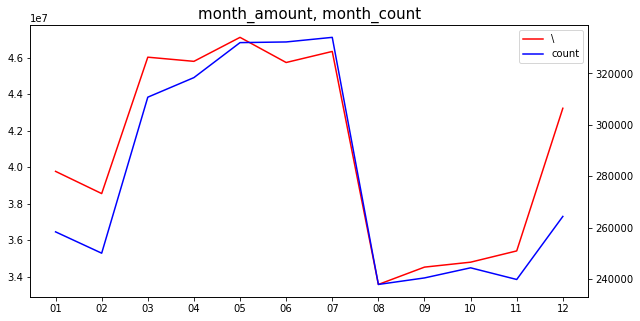

In [314]:
plt.figure(figsize=(10,5))
plt.title("month_amount, month_count", fontsize=15)
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(fred2_3_sum, color='red', label="\\")
b, = ax2.plot(fred5, "-", color='blue', label="count")
p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p])
plt.show()

## hour과 amount의 상관관계

In [316]:
fred3_3 = df['amount'].groupby(df['hour'])
fred3_3_sum = fred3_3.sum()

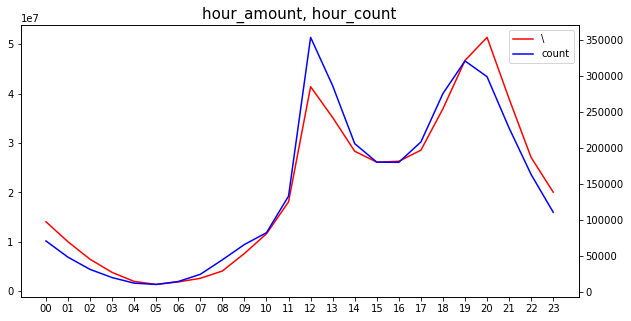

In [317]:
plt.figure(figsize=(10,5))
plt.title("hour_amount, hour_count", fontsize=15)
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(fred3_3_sum, color='red', label="\\")
b, = ax2.plot(fred6, "-", color='blue', label="count")
p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p])
plt.show()

# 점심시간은 수에 비해서 적은 금액을 사용하고 저녁시간은 건수에 비해 많은 비용을 사용한다.

## 3개의 column을 사용한 여러개의 그래프를 한번에 보기

In [318]:
df2 = pd.pivot_table(df, index = ["days_of_week"], columns =  ["month"], values="amount", aggfunc=np.mean)
df2

month,01,02,03,04,05,06,07,08,09,10,11,12
days_of_week,,,,,,,,,,,,
0,148.95,150.88,138.46,153.86,136.07,135.97,136.23,139.70,140.20,137.87,146.19,158.19
1,155.80,158.86,155.21,139.50,136.60,140.71,139.51,135.79,159.08,152.90,150.15,168.08
2,159.99,159.91,144.88,138.84,147.43,139.07,147.24,149.62,151.86,145.61,148.66,166.31
3,156.89,154.10,154.08,146.06,147.88,140.81,141.83,154.42,139.82,148.89,153.44,171.89
4,162.60,162.40,150.24,149.70,147.69,140.09,143.60,146.71,148.67,143.29,147.50,173.22
5,154.36,154.54,153.05,145.65,145.22,141.12,139.48,135.06,139.24,143.17,152.45,161.23
6,138.26,136.96,136.08,133.64,130.63,123.13,125.21,123.19,125.91,128.39,132.98,144.89


<AxesSubplot:xlabel='days_of_week'>

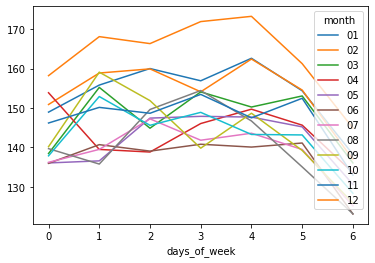

In [320]:
df2.plot()

In [325]:
df3 = pd.pivot_table(df, index = ["hour"], columns =  ["days_of_week"], values="amount", aggfunc=np.mean)
df3

days_of_week,0,1,2,3,4,5,6
hour,,,,,,,
00,150.06,210.70,225.98,218.08,220.91,204.94,167.80
01,160.05,226.18,230.29,240.75,235.29,210.67,174.28
02,160.80,226.43,216.03,229.17,230.30,218.08,185.96
03,147.92,200.28,191.24,211.31,201.39,217.11,180.85
04,144.02,145.82,158.37,181.17,149.24,197.76,172.18
05,111.08,115.06,163.39,161.13,132.00,134.06,140.60
06,126.60,139.00,149.39,128.68,135.98,134.71,120.14
07,105.70,105.69,105.21,105.91,111.06,116.76,109.55
08,93.97,89.02,86.90,84.54,89.16,108.52,105.59


<AxesSubplot:xlabel='hour'>

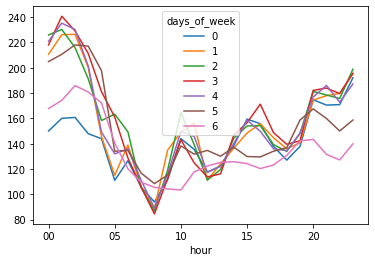

In [326]:
df3.plot()

평일의 패턴은 거의 유사한 것을 볼 수 있지만 주말의 패턴은 조금 특별하다.
일요일의 경우 저녁 이후의 시간이 되면 될수록 평일과 유사한 패턴이 보이지만
토요일같은 경우는 그만큼의 매출에 미치지 못하는 것을 파악할 수 있다.